In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.style.use('ggplot')
%matplotlib inline

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')


print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst look at the data:")
display(df.head(3))

print("\nKey columns overview:")
print(
    df[
        [
            "date",
            "location",
            "total_cases",
            "new_cases",
            "total_deaths",
            "new_deaths",
            "total_vaccinations",
            "people_vaccinated",
            "people_fully_vaccinated",
        ]
    ].head(2)
)

print("\nMissing values summary:")
missing_data = df.isnull().sum().sort_values(ascending=False)
display(missing_data[missing_data > 0].head(15))

Dataset contains 302512 rows and 67 columns

First look at the data:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN



Key columns overview:
         date     location  total_cases  new_cases  total_deaths  new_deaths  \
0  2020-01-03  Afghanistan          NaN        0.0           NaN         0.0   
1  2020-01-04  Afghanistan          NaN        0.0           NaN         0.0   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  
0                 NaN                NaN                      NaN  
1                 NaN                NaN                      NaN  

Missing values summary:


weekly_icu_admissions                      293411
weekly_icu_admissions_per_million          293411
excess_mortality                           292217
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality_cumulative_per_million    292217
weekly_hosp_admissions                     281225
weekly_hosp_admissions_per_million         281225
icu_patients_per_million                   267748
icu_patients                               267748
hosp_patients_per_million                  267374
hosp_patients                              267374
total_boosters_per_hundred                 260188
total_boosters                             260188
new_vaccinations                           241970
dtype: int64

In [6]:
## Data Cleaning
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Select countries of interest and relevant columns
countries = [
    "United States",
    "Japan",
    "Gabon",
    "Germany",
    "Mauritania",
    "Kenya",
    "South Africa",
]
columns_needed = [
    "date",
    "location",
    "total_cases",
    "new_cases",
    "total_deaths",
    "new_deaths",
    "total_vaccinations",
    "people_vaccinated",
    "people_fully_vaccinated",
    "population",
    "iso_code",
    "total_cases_per_million",
    "total_deaths_per_million",
]

clean_df = df[df["location"].isin(countries)][columns_needed].copy()

# Handle missing values
for metric in ["total_cases", "new_cases", "total_deaths", "new_deaths"]:
    clean_df[metric] = clean_df.groupby("location")[metric].ffill().fillna(0)

for vax_metric in [
    "total_vaccinations",
    "people_vaccinated",
    "people_fully_vaccinated",
]:
    clean_df[vax_metric] = clean_df.groupby("location")[vax_metric].ffill().fillna(0)

# Calculate derived metrics
clean_df["death_rate"] = clean_df["total_deaths"] / clean_df["total_cases"]
clean_df["vax_percentage"] = (
    clean_df["people_fully_vaccinated"] / clean_df["population"]
) * 100

print("\nData after cleaning:")
display(clean_df.head())


Data after cleaning:


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,iso_code,total_cases_per_million,total_deaths_per_million,death_rate,vax_percentage
94402,2020-01-03,Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388997.0,GAB,NaN,NaN,NaN,0.0
94403,2020-01-04,Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388997.0,GAB,NaN,NaN,NaN,0.0
94404,2020-01-05,Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388997.0,GAB,NaN,NaN,NaN,0.0
94405,2020-01-06,Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388997.0,GAB,NaN,NaN,NaN,0.0
94406,2020-01-07,Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388997.0,GAB,NaN,NaN,NaN,0.0


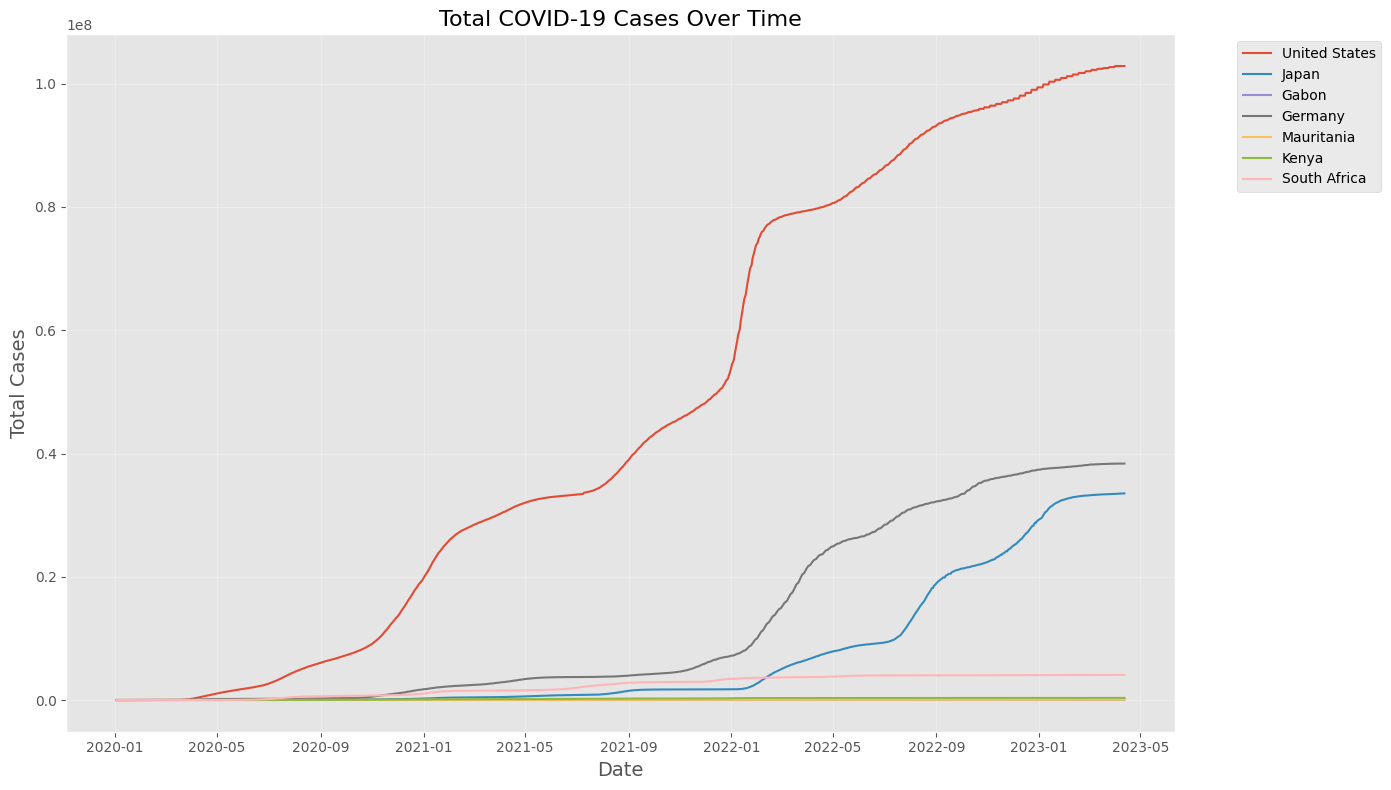

In [7]:
# Exploratory Data Analysis (EDA)
# Time Series Analysis
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = clean_df[clean_df["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Cases", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

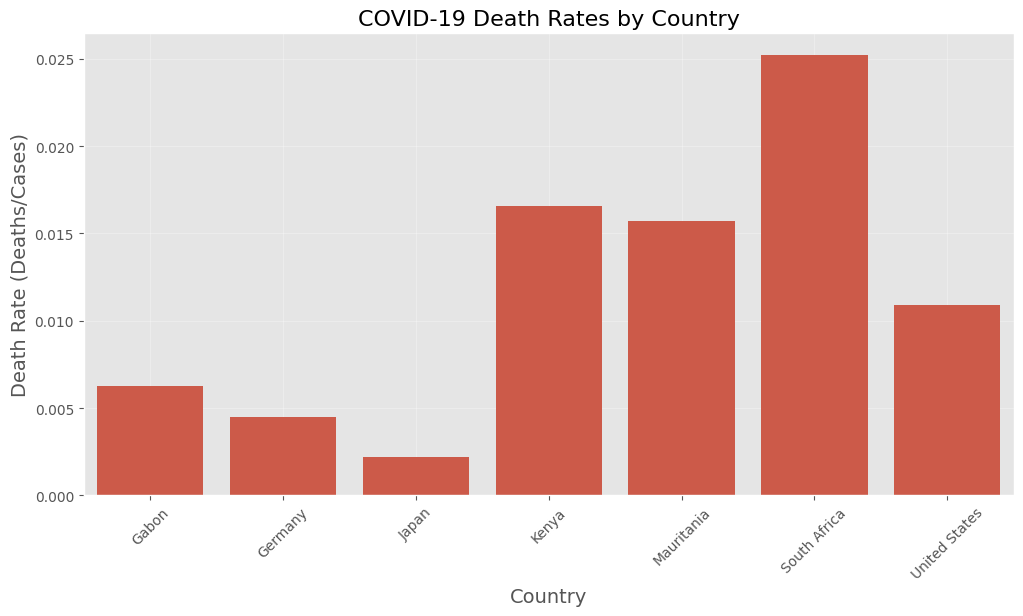

In [8]:
# Death Rate Analysis
latest_data = clean_df.sort_values("date").groupby("location").last()

plt.figure(figsize=(12, 6))
sns.barplot(x=latest_data.index, y=latest_data["death_rate"].fillna(0))
plt.title("COVID-19 Death Rates by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Death Rate (Deaths/Cases)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

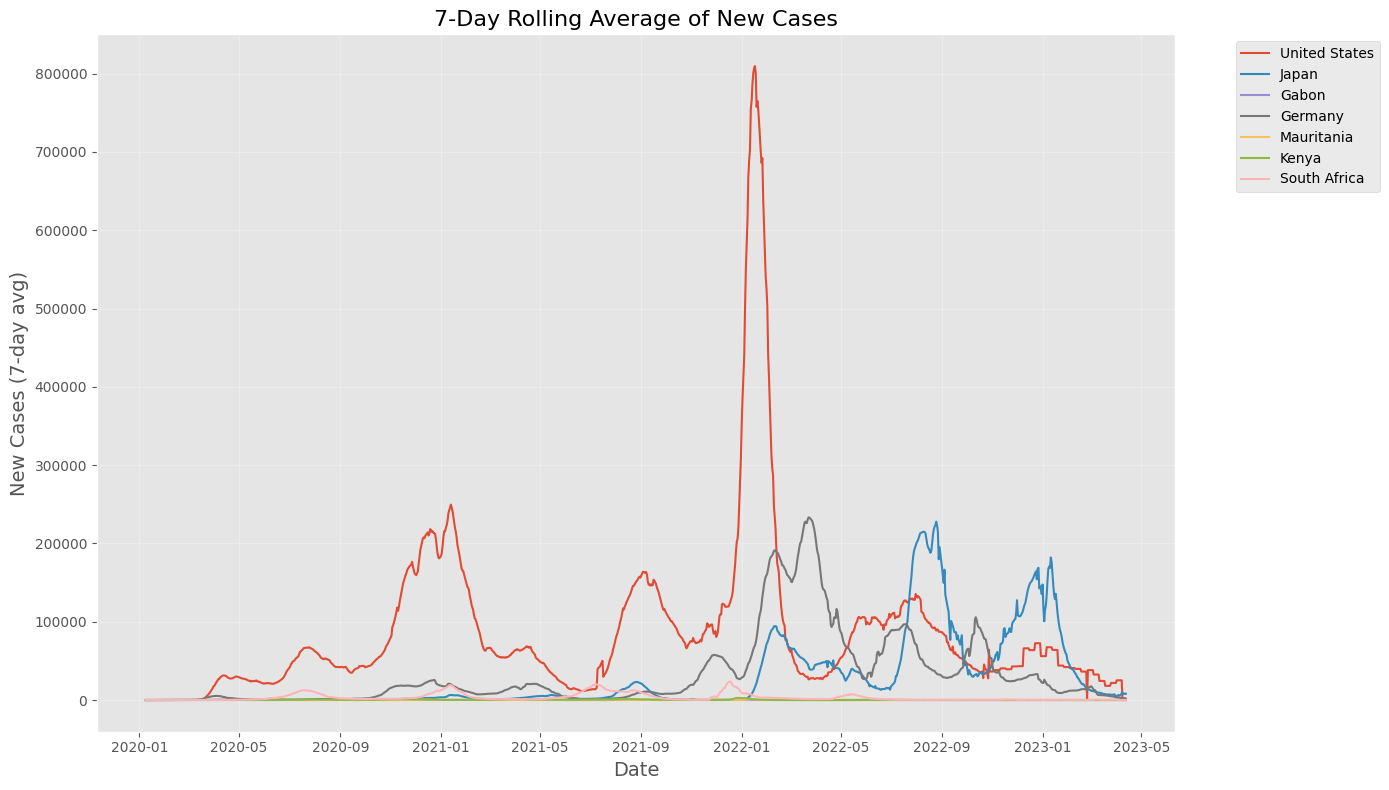

In [9]:
### New Cases Comparison (7-day rolling average)
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = clean_df[clean_df["location"] == country].set_index("date")
    country_data["rolling_avg"] = country_data["new_cases"].rolling(7).mean()
    plt.plot(country_data.index, country_data["rolling_avg"], label=country)

plt.title("7-Day Rolling Average of New Cases", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("New Cases (7-day avg)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

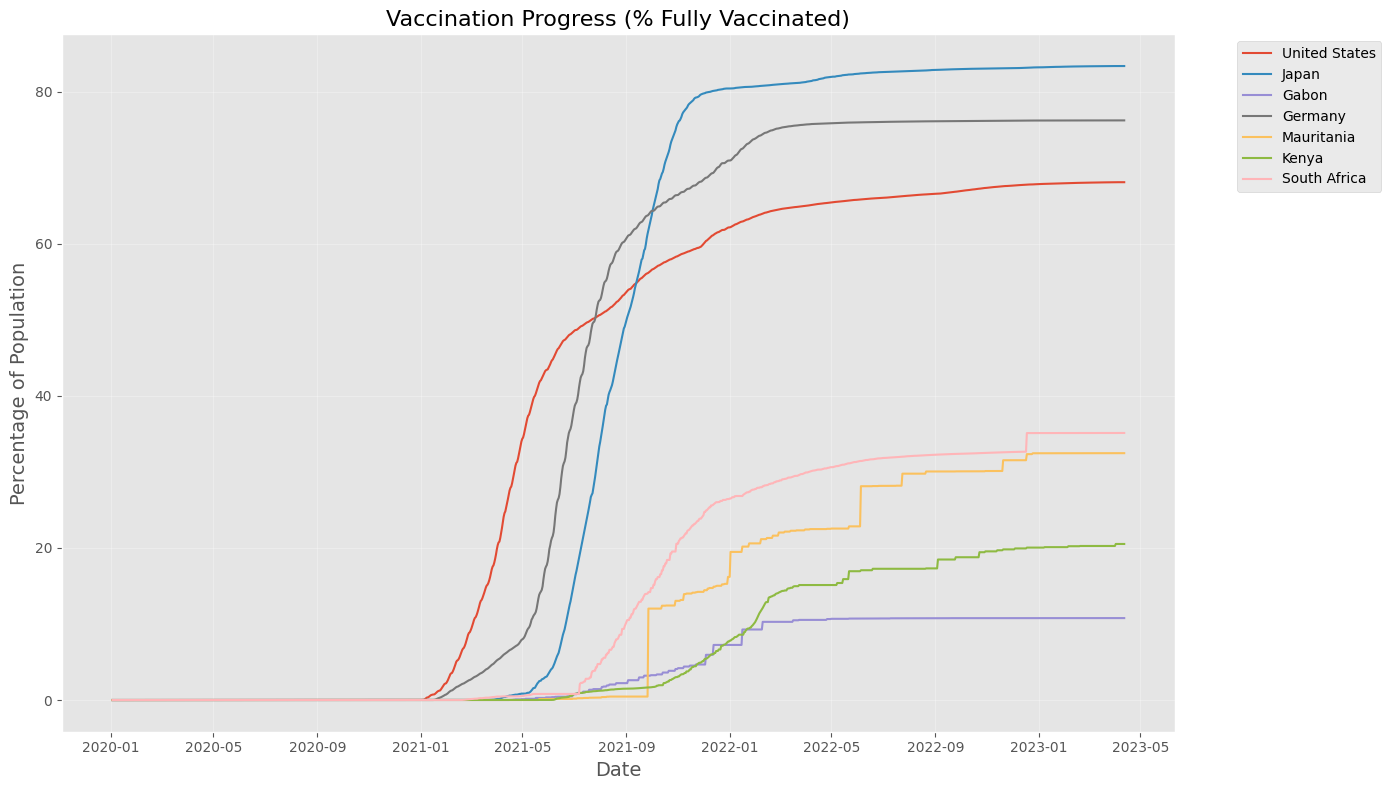

In [10]:
# Vaccination Progress Analysis
# Vaccination Timeline
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = clean_df[clean_df["location"] == country]
    plt.plot(country_data["date"], country_data["vax_percentage"], label=country)

plt.title("Vaccination Progress (% Fully Vaccinated)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percentage of Population", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

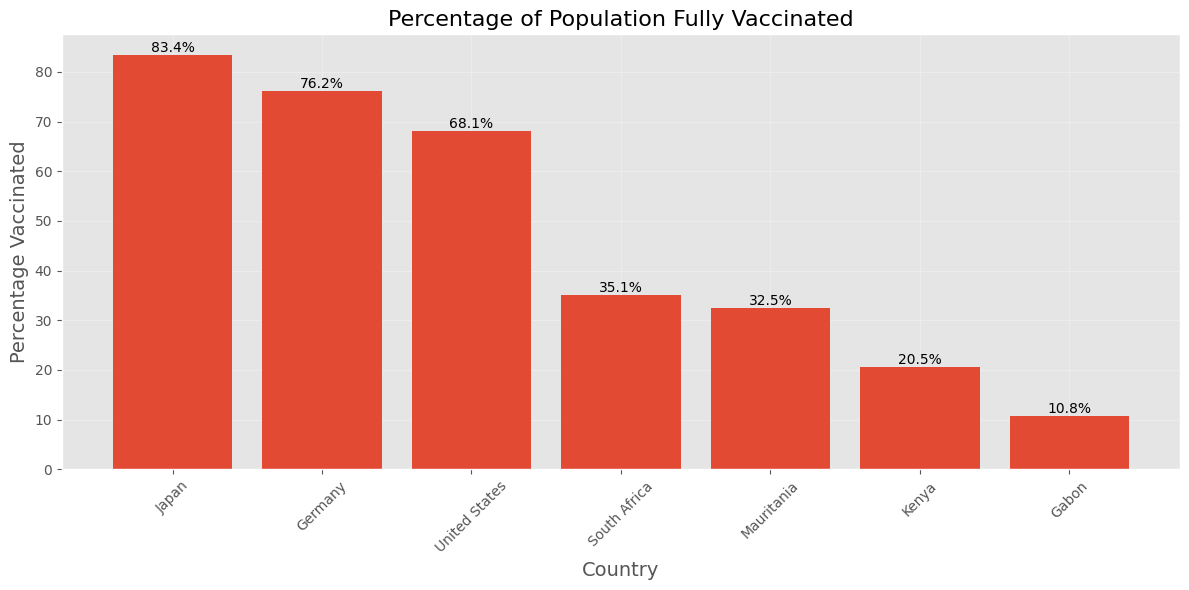

In [11]:
# Latest Vaccination Status
latest_vax = latest_data.sort_values("vax_percentage", ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(latest_vax.index, latest_vax["vax_percentage"])
plt.title("Percentage of Population Fully Vaccinated", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Percentage Vaccinated", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

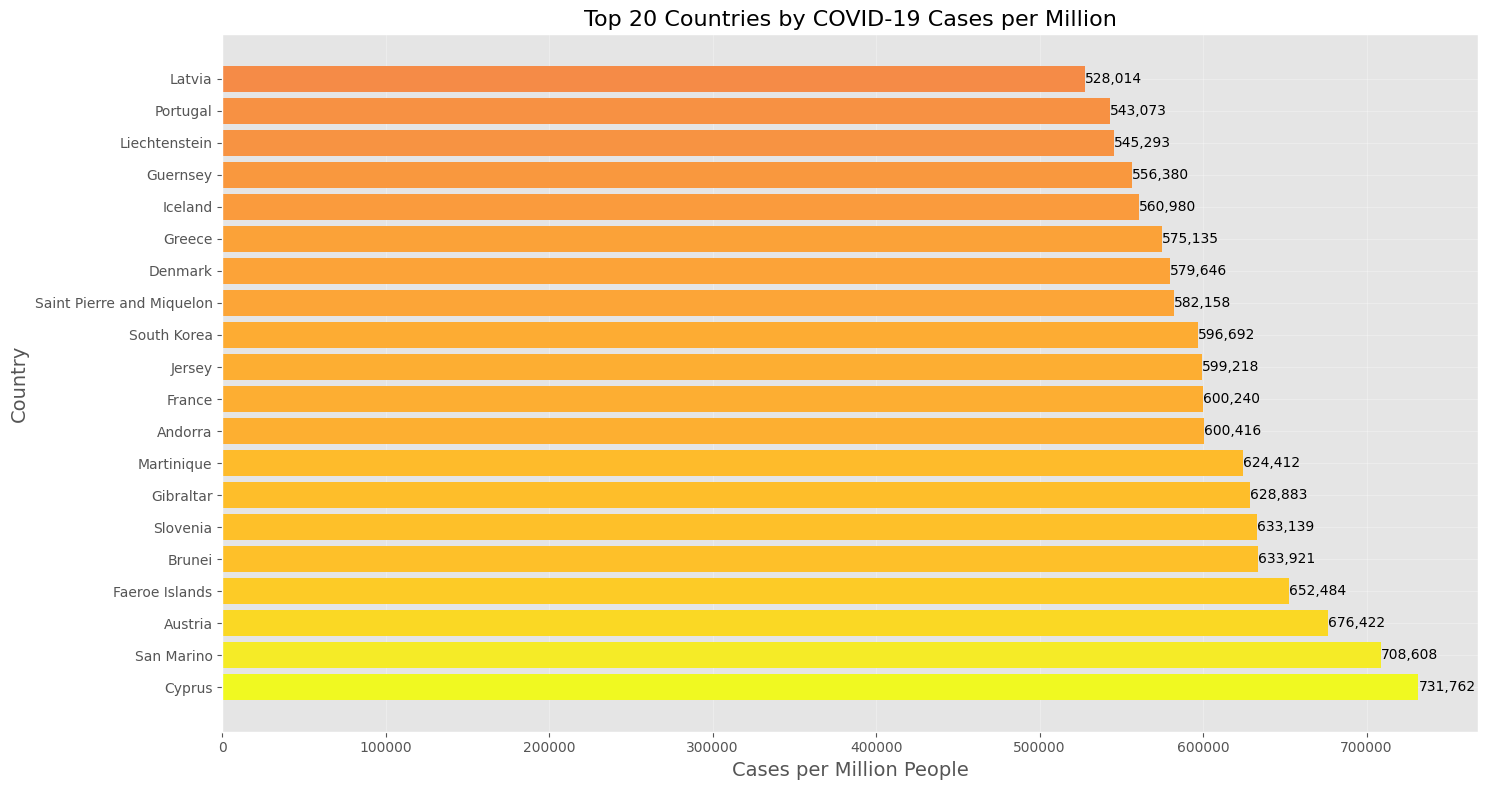

In [12]:
# Choropleth Map (Global View)
# Prepare global data for mapping
latest_global = df.sort_values("date").groupby("location").last().reset_index()

# Create a static alternative using matplotlib
plt.figure(figsize=(15, 8))
top_countries = latest_global.sort_values(
    "total_cases_per_million", ascending=False
).head(20)

bars = plt.barh(
    top_countries["location"],
    top_countries["total_cases_per_million"],
    color=plt.cm.plasma(
        top_countries["total_cases_per_million"]
        / top_countries["total_cases_per_million"].max()
    ),
)

plt.title("Top 20 Countries by COVID-19 Cases per Million", fontsize=16)
plt.xlabel("Cases per Million People", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,.0f}",
        va="center",
        ha="left",
    )

plt.tight_layout()
plt.show()

### Summary Insights and Findings from the COVID-19 Data:

1. **Dataset Overview**:
   - The dataset contains information on COVID-19 cases, deaths, and vaccinations across various countries.
   - Key columns include `total_cases`, `new_cases`, `total_deaths`, `new_deaths`, `total_vaccinations`, and `people_fully_vaccinated`.

2. **Data Cleaning**:
   - Missing values in key metrics (e.g., cases, deaths, vaccinations) were forward-filled and replaced with zeros where necessary.
   - Derived metrics such as `death_rate` (deaths/cases) and `vax_percentage` (percentage of fully vaccinated population) were calculated for deeper analysis.

3. **Exploratory Data Analysis (EDA)**:
   - **Total Cases Over Time**:
     - A time series analysis showed the progression of total COVID-19 cases for selected countries (e.g., United States, Japan, Germany).
     - Clear trends of case surges were observed, varying by country and timeline.

   - **Death Rate Analysis**:
     - Death rates varied significantly across countries, with some countries exhibiting higher rates due to factors like healthcare infrastructure and population demographics.

   - **New Cases (7-Day Rolling Average)**:
     - Rolling averages highlighted trends in new cases, smoothing out daily fluctuations.
     - Countries experienced peaks at different times, reflecting the global spread of the pandemic.

   - **Vaccination Progress**:
     - Vaccination rates varied widely, with some countries achieving higher percentages of fully vaccinated populations.
     - The timeline analysis showed steady progress in vaccination campaigns over time.

4. **Key Findings**:
   - **Top 20 Countries by Cases per Million**:
     - A horizontal bar chart revealed the countries with the highest cases per million population, emphasizing the disproportionate impact of the pandemic on certain nations.
   - **Vaccination Status**:
     - Countries with higher vaccination percentages generally showed better control over new cases and lower death rates.
   - **Global Disparities**:
     - Significant disparities in cases, deaths, and vaccination rates were observed between countries, highlighting the unequal impact of the pandemic.

5. **Visual Highlights**:
   - The use of bar plots, line charts, and rolling averages effectively communicated trends and comparisons.
   - Value labels on charts provided precise numerical insights, enhancing interpretability.

### Recommendations:
- Further analysis could explore correlations between vaccination rates and death rates or new cases.
- Investigate the impact of government policies and healthcare infrastructure on the observed trends.
- Expand the analysis to include more countries or regions for a comprehensive global perspective.